#### Imports

In [18]:
from sklearn.neighbors import KNeighborsClassifier
import evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.feature_selection import RFE

#### Retrieve Stored Variables
Standard dataset

In [19]:
%store -r data

#### Variable That Removes Class Variable and ID from Dataset

In [20]:
clean = list(set(list(data)) - set(['default_payment_next_month', 'id']))

#### Seperate Dataset into Training and Testing Subsets
70/30 split will be used

In [21]:
std_x_train, std_x_test, std_y_train, std_y_test = train_test_split(data[clean], 
                                                                    data['default_payment_next_month'], 
                                                                    test_size=0.3, 
                                                                    random_state=14)

#### Instantiate Decision Tree Model Object

In [22]:
model = KNeighborsClassifier()

#### Train the Model on the Training Data and Use it to Predict Y Values of Test Set
Include the time taken

In [23]:
start = time.time()
model.fit(X = std_x_train,
          y = std_y_train)
results = confusion_matrix(y_pred = model.predict(std_x_test),
                           y_true = std_y_test)
end = time.time()
print(f'The model took {round(end - start, 2)} seconds to train and predict.')

The model took 6.78 seconds to train and predict.


#### Display Confusion Matrix

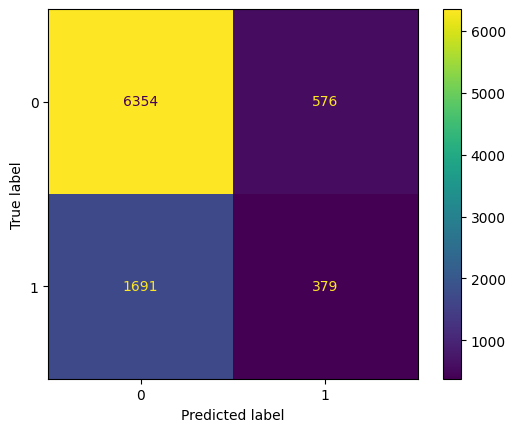

In [24]:
ConfusionMatrixDisplay(results).plot()

#### Evaluate the Model Using Custom Eval Metrics Class

In [25]:
metrics = evaluation.evalMetrics(results)

In [26]:
print(f'The Accuracy of the Model: {round(metrics.accuracy(),3)}')
print(f'The Precision of the Model: {round(metrics.precision(),2)}')
print(f'The Recall of the Model: {round(metrics.recall(),2)}')
print(f'The F-Score of the Model: {round(metrics.fScore(),2)}')
print(f'The Negative Predictive Value  of the Model: {round(metrics.negativePredictiveValue(),2)}')
print(f'The Positive Predicitive Value of the Model: {round(metrics.positivePredictiveValue(),2)}')

The Accuracy of the Model: 0.748
The Precision of the Model: 0.79
The Recall of the Model: 0.92
The F-Score of the Model: 0.85
The Negative Predictive Value  of the Model: 0.4
The Positive Predicitive Value of the Model: 0.79


#### Cross Validate the Model Using Accuracy

In [27]:
start = time.time()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=28)
cv_scores = cross_val_score(model, data[clean], data['default_payment_next_month'], scoring='accuracy', cv=cv)
end = time.time()

#### Evaluate the Results of the Cross-Validation

In [28]:
print(f'Cross Validation took {round(end - start, 2)} seconds and produced an average accuracy of {round(mean(cv_scores),3)}')

Cross Validation took 77.74 seconds and produced an average accuracy of 0.755


#### Retrieve the Selected Features from the Random Forest Algorithm

In [29]:
%store -r selected_features

In [30]:
selected_features

['bill_amt1', 'age', 'limit_bal', 'pay_0', 'bill_amt2']

#### Retrain Model on Selected Features and Evaluate Change in Performance

In [31]:
features_x_train, features_x_test, features_y_train, features_y_test = train_test_split(data[selected_features], 
                                                                    data['default_payment_next_month'], 
                                                                    test_size=0.3, 
                                                                    random_state=96)

#### Reinstantiate Model and Fit/Predict

In [32]:
model = KNeighborsClassifier()

In [33]:
start = time.time()
model.fit(X = features_x_train,
          y = features_y_train)
results = confusion_matrix(y_pred = model.predict(features_x_test),
                           y_true = features_y_test)
end = time.time()
print(f'The model took {round(end - start, 2)} seconds to train and predict.')

The model took 0.75 seconds to train and predict.


#### Display CF

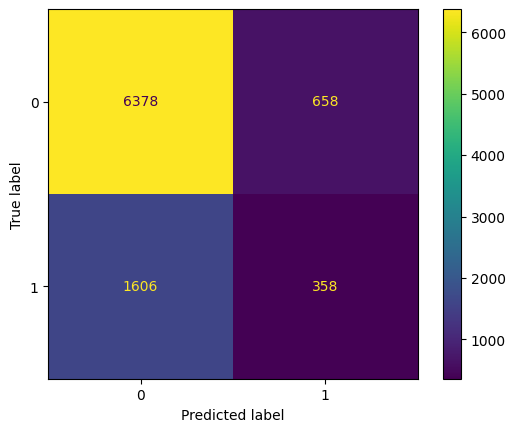

In [34]:
ConfusionMatrixDisplay(results).plot()

#### Evaluate and Cross-Validate

In [35]:
metrics = evaluation.evalMetrics(results)
print(f'The Accuracy of the Model: {round(metrics.accuracy(),3)}')
print(f'The Precision of the Model: {round(metrics.precision(),2)}')
print(f'The Recall of the Model: {round(metrics.recall(),2)}')
print(f'The F-Score of the Model: {round(metrics.fScore(),2)}')
print(f'The Negative Predictive Value  of the Model: {round(metrics.negativePredictiveValue(),2)}')
print(f'The Positive Predicitive Value of the Model: {round(metrics.positivePredictiveValue(),2)}')

The Accuracy of the Model: 0.748
The Precision of the Model: 0.8
The Recall of the Model: 0.91
The F-Score of the Model: 0.85
The Negative Predictive Value  of the Model: 0.35
The Positive Predicitive Value of the Model: 0.8


In [36]:
start = time.time()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=17)
cv_scores = cross_val_score(model, data[selected_features], data['default_payment_next_month'], scoring='accuracy', cv=cv)
end = time.time()
print(f'Cross Validation took {round(end - start, 2)} seconds and produced an average accuracy of {round(mean(cv_scores),3)}')

Cross Validation took 8.8 seconds and produced an average accuracy of 0.745
